In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

C:\Users\Isabel\AppData\Local\Temp\ipykernel_14384\1403709952.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('fligh-data-clean.csv', index_col=0)

In [3]:
df_booked = df[df['flights booked'] > 0]

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

Text(0.5, 1.0, 'Vuelos reservados en 2017')

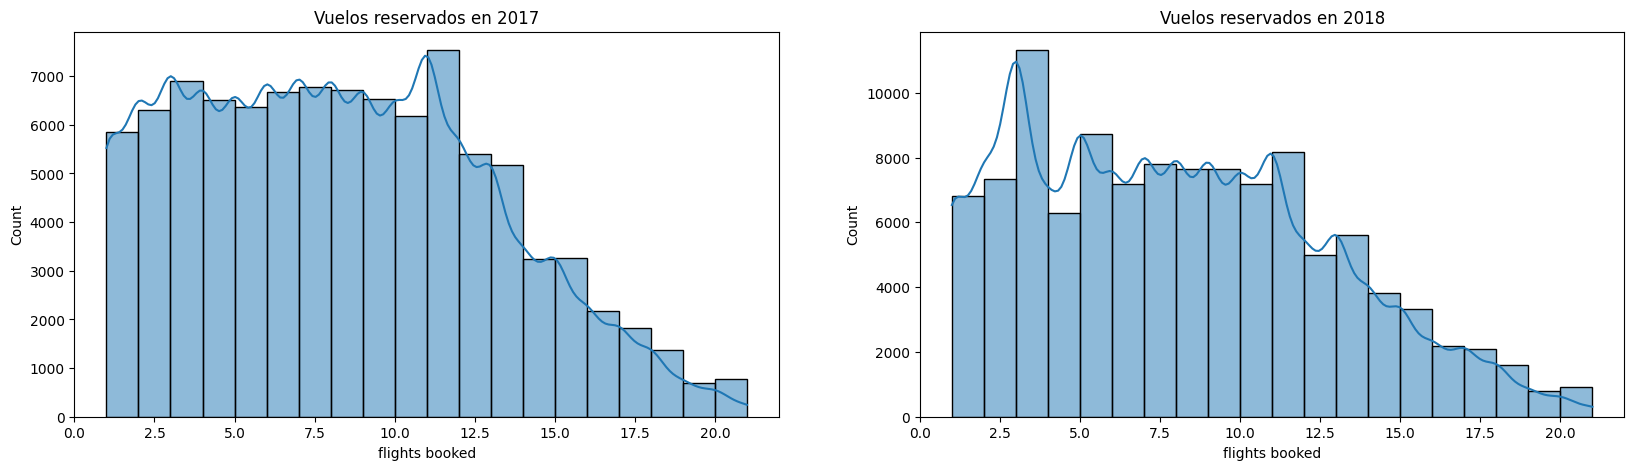

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.histplot(x='flights booked',
             data = df_booked[df_booked['year']==2018],
             kde=True,
             bins=20,
             ax=axes[1])
axes[1].set_title('Vuelos reservados en 2018')

sns.histplot(x='flights booked',
             data = df_booked[df_booked['year']==2017],
             kde=True,
             bins=20,
             ax=axes[0])
axes[0].set_title('Vuelos reservados en 2017')

Text(0.5, 1.0, 'Vuelos reservados en 2017')

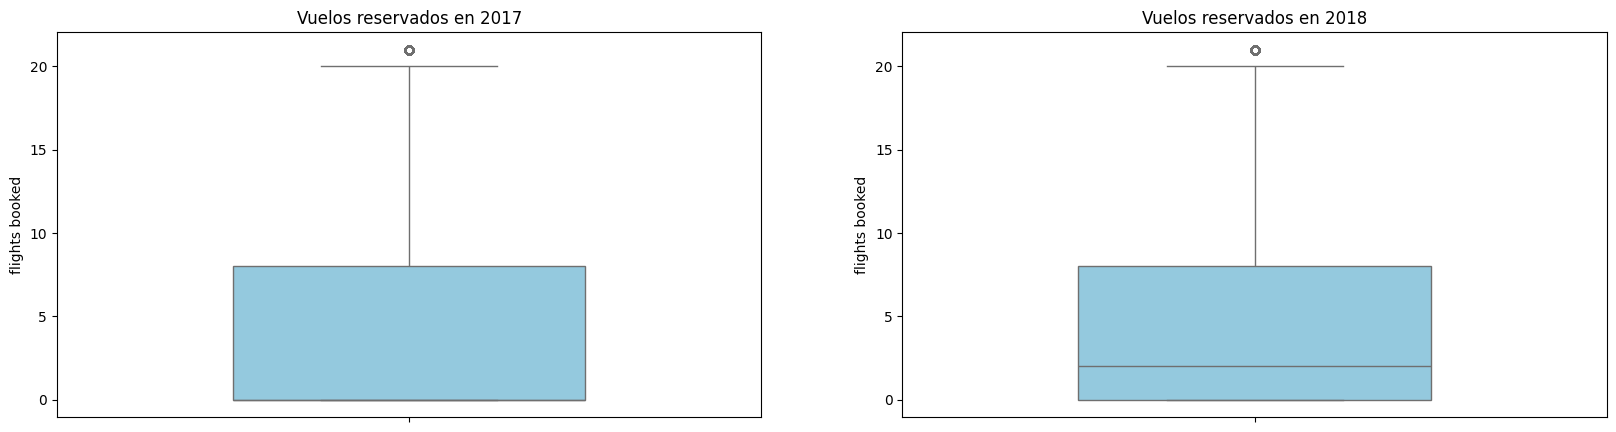

In [5]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(y = "flights booked", 
            data = df[df['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[0])


sns.boxplot(y = "flights booked", 
            data = df[df['year']==2018], 
            width = 0.5,
            color='skyblue',
            ax=axes[1])


axes[1].set_title('Vuelos reservados en 2018')
axes[0].set_title('Vuelos reservados en 2017')

Text(0.5, 1.0, 'Vuelos reservados en 2017')

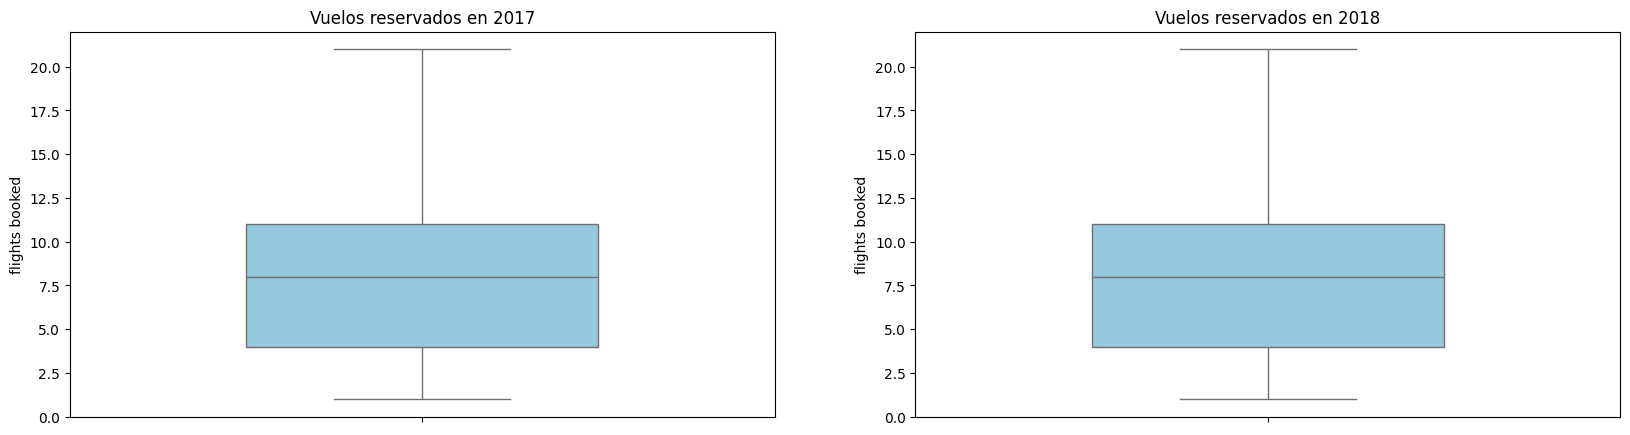

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.boxplot(y = "flights booked", 
            data = df_booked[df_booked['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[0])


sns.boxplot(y = "flights booked", 
            data = df_booked[df_booked['year']==2018], 
            width = 0.5,
            color='skyblue',
            ax=axes[1])


axes[1].set_title('Vuelos reservados en 2018')
axes[0].set_title('Vuelos reservados en 2017')

In [7]:
df_booked.pivot_table(index='year', values='flights booked', aggfunc=['mean', 'median'])


,mean,median
,flights booked,flights booked
year,,
2017,8.178334,8.0
2018,7.918666,8.0


> Una gran cantidad de afiliados no reservaron vuelos, si bien es cierto que en 2018 hubo un aumento de ventas. 

> Si tenemos en cuenta únicamente los datos de aquellos que sí realizaron vuelos, vemos que en 2017 la distribución está sesgada a la derecha, mientras que en 2018 está sesgada a la izquierda. Esto explica por qué en 2017 la media de vuelos es mayor (no por demasiado) a la mediana, y en 2018 ocurre al contrario.

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

<Axes: xlabel='distance', ylabel='points accumulated'>

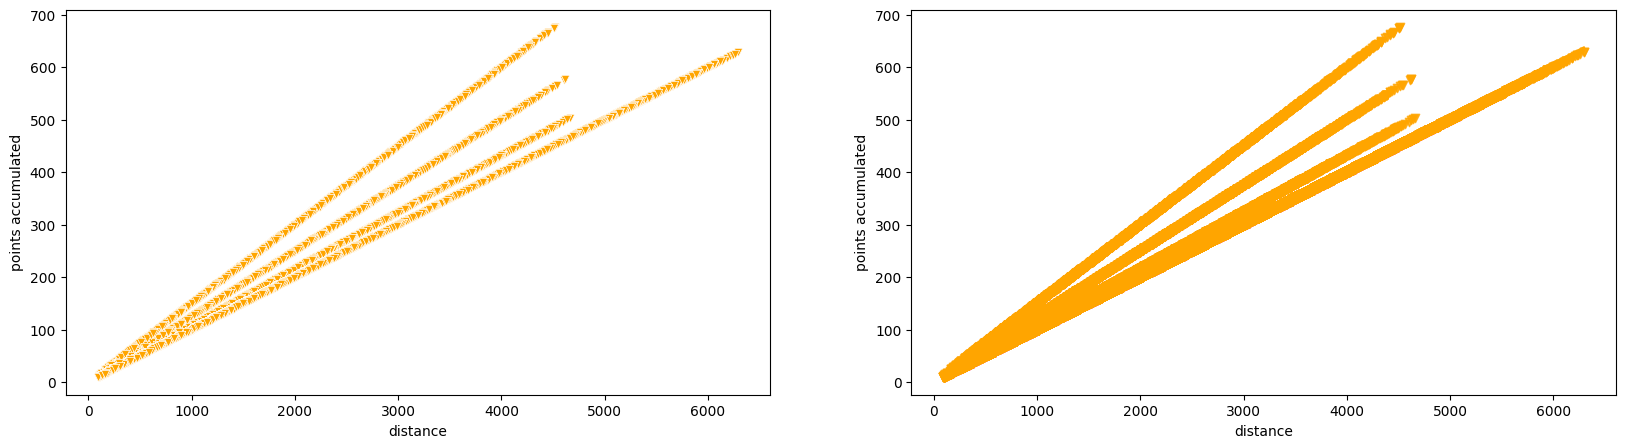

In [8]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.scatterplot(x='distance',
                y= 'points accumulated',
                data = df_booked,
                marker='v',
                color = 'orange',
                ax=axes[0])

sns.regplot(x='distance',
                y= 'points accumulated',
                data = df_booked,
                marker='v',
                color = 'orange',
                ax=axes[1])

> Son proporcionales, aunque a diferentes escalas. Parece indicar que, según alguna subagrupación como puede ser el grado de loyalty, se otorgan diferentes puntos por distancia.

3. ¿Cuál es la distribución de los clientes por provincia o estado?


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'alberta'),
  Text(1, 0, 'ontario'),
  Text(2, 0, 'british columbia'),
  Text(3, 0, 'saskatchewan'),
  Text(4, 0, 'quebec'),
  Text(5, 0, 'newfoundland'),
  Text(6, 0, 'manitoba'),
  Text(7, 0, 'new brunswick'),
  Text(8, 0, 'nova scotia'),
  Text(9, 0, 'prince edward island'),
  Text(10, 0, 'yukon')])

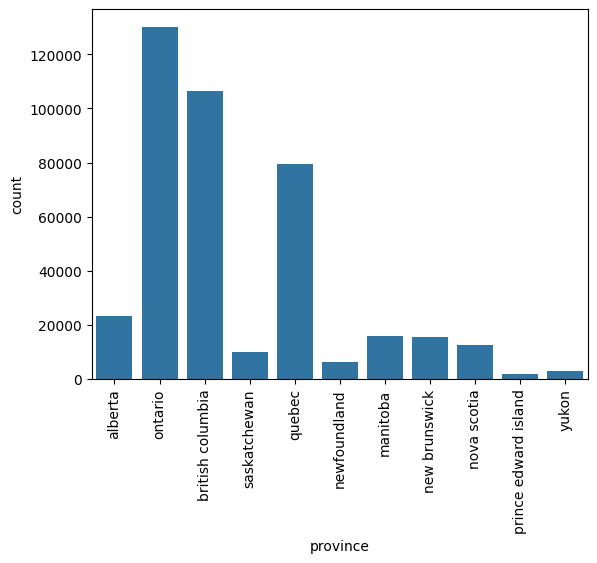

In [9]:
sns.countplot(x='province',
              data=df)
plt.xticks(rotation = 90)

In [10]:
for provincia in df['province'].unique():
    if provincia in ['ontario', 'british columbia', 'quebec']:
        print(f'Clientes de {provincia}:', (df['province'] == provincia).sum())


Clientes de ontario: 130258
Clientes de british columbia: 106442
Clientes de quebec: 79549


> Ontario parece ser la provincia donde hay mayor cantidad de afiliados a la aerolínea, con British Columbia y Quebec a una distancia considerable, pero aun así superior al resto de provincias. 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

<Axes: xlabel='salary', ylabel='education'>

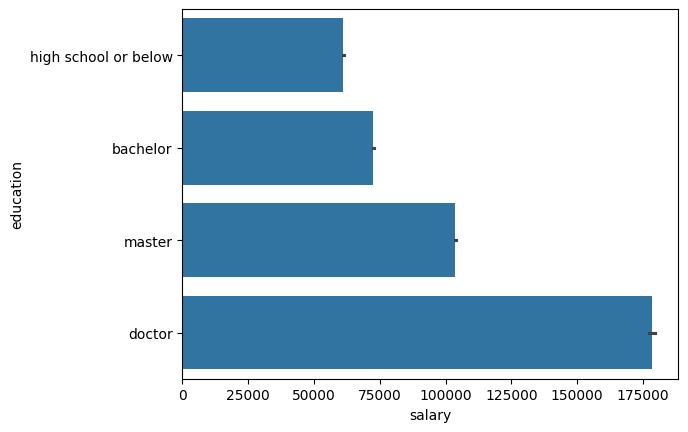

In [11]:
sns.barplot(y='education',
            x='salary',
            data=df[df['education']!='college'],
            order=['high school or below', 'bachelor', 'master', 'doctor'])

> tenemos también la categoría 'college', no obstante, no tenemos datos de salario de los usuarios pertenecientes a ese grupo. El salario aumenta en consonancia al nivel educativo; es decir, los de estudiantes de instituto los sueldos son más bajos que los de doctorados. Hay significativas diferencias en el promedio salarial entre bachelor y master, así como entre master y doctor. Podríamos asumir que los sueldos de college estarían entre high school y bachelor.

In [20]:
df.columns

Index(['year', 'month', 'flights booked', 'flights with companions',
       'total flights', 'distance', 'points accumulated', 'points redeemed',
       'dollar cost points redeemed', 'country', 'province', 'city',
       'postal code', 'gender', 'education', 'salary', 'marital status',
       'loyalty card', 'clv', 'enrollment type', 'enrollment year',
       'enrollment month'],
      dtype='object')

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

🚨🚩 para hacer el pie plot necesito pasar loyalty number como columna

<Axes: xlabel='loyalty card', ylabel='count'>

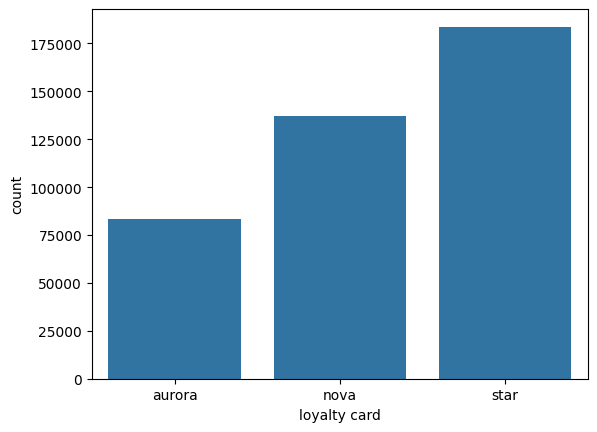

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.countplot(x='loyalty card',
            data=df,
            ax=axes[0])

plt.pie(df['country'], labels=df_country['continent'],
        data= df_country,
        autopct=  '%6.1f%%', 
        colors = colores, 
        textprops={'fontsize': 11}, 
        startangle=90)

Text(0.5, 1.0, 'Relación total de vuelos tomados y loyalty card')

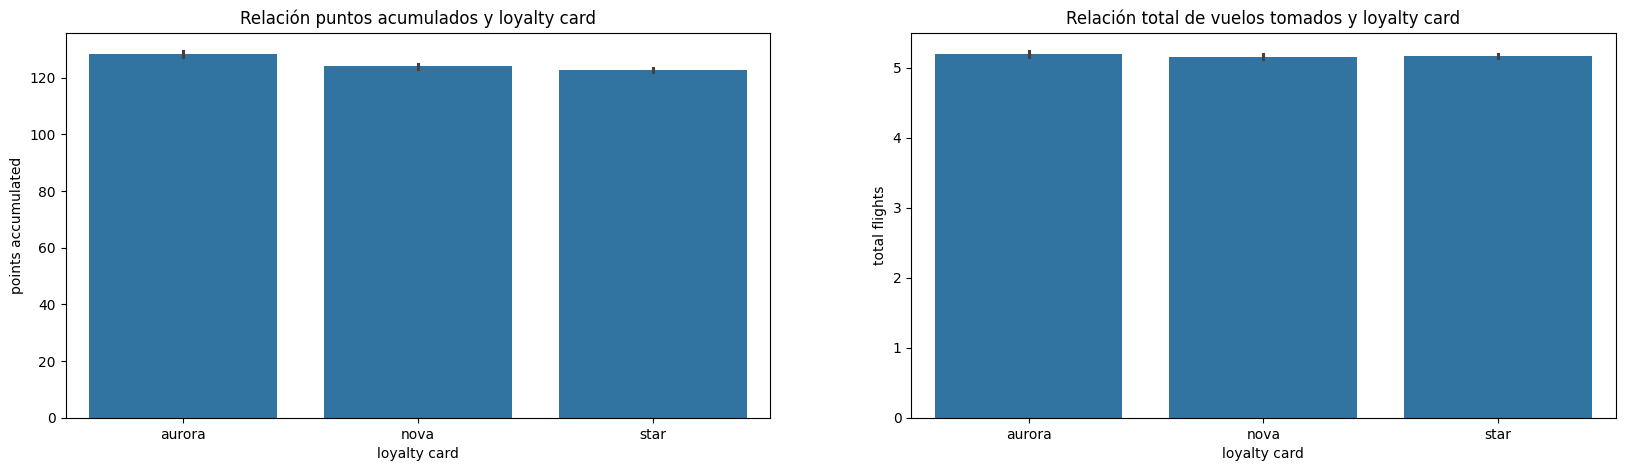

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.barplot(y='points accumulated',
            x= 'loyalty card',
            data=df,
            ax=axes[0])
axes[0].set_title('Relación puntos acumulados y loyalty card')


sns.barplot(y='total flights',
            x= 'loyalty card',
            data=df,
            ax=axes[1])

axes[1].set_title('Relación total de vuelos tomados y loyalty card')

> Sin emabrgo, no parece que el rango de loyalty repercuta en el número de vuelos tomados o los puntos acumulados

6. ¿Cómo se distribuyen los clientes según su estado civil y género?


<Axes: xlabel='marital status', ylabel='count'>

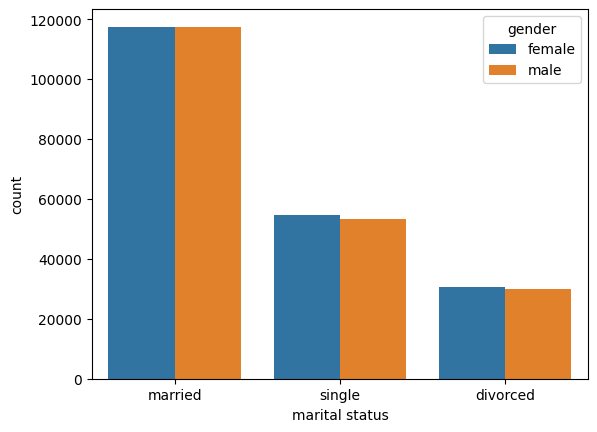

In [13]:
sns.countplot(x='marital status',
              hue = 'gender',
              data = df)

> No podemos hablar de una diferencia significativa en cuanto a género según el estado civil